# ニューラルネットワーク(ディープラーニング)

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# ジュピターノートブック上でグラフを表示させるための処理
%matplotlib inline

import mglearn

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

## データセットの準備

In [9]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## ニューラルネットワークモデル

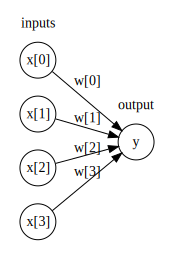

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

⬆︎線形回帰を図示したもの。入力特徴量と予測がノードとして与えられており、係数がノードを結んでいる。

ここで、左側のノード群は`入力特徴量`を表し、接続している線が`学習された係数`を、右側のノードが`出力`を表す。

出力は、入力に対する重み付き和になっている。

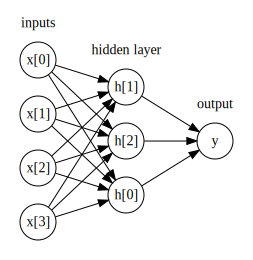

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

⬆︎一層の隠れ層を持つ多層パーセプトロン(MultiLayer Perceptron: MLP)

MLPではこの重み付き和の計算が繰り返し行われる。
- まず中間処理ステップを表す`隠れユニット`の計算で重み付き和が行われ、
- 次に、この隠れユニットの値に対して重み付き和が行われて、
- 最後の結果が算出される

このモデルを線形モデルよりも強力にするために、個々の隠れユニットの重み付き和を計算したら、その結果に対して非線形関数を適用する。\
多くの場合、relu(rectified linear unit: 正規化線形関数)やtanh(hyperbolic tangent: 双曲正接関数)が用いられる。
- relu関数は、ゼロ以下の値を切り捨てている。
- tanh関数は、小さい値に対しては-1に、大きい値に対しては+1に飽和する。

In [4]:
line = np.linspace(-3, 3, 100)

In [6]:
line

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

Text(0, 0.5, 'relu(x), tanh(x)')

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


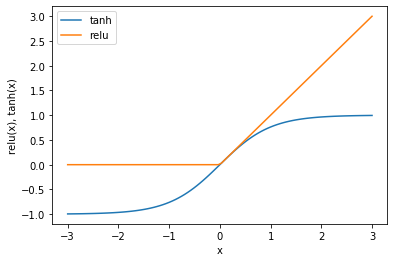

In [7]:
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

⬆︎ 活性化関数tanh(双曲正接関数/ハイパボリックタンジェント)とrelu(正規化線形関数)

## ニューラルネットワークのチューニング

In [10]:
mlp = MLPClassifier(solver='lbfgs', random_state=0)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Text(0, 0.5, 'Feature 1')

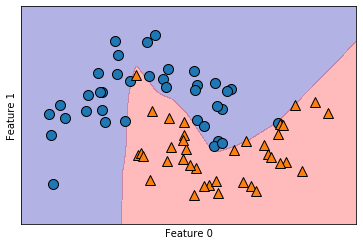

In [11]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

⬆︎ 隠れ層に100ユニットを持つニューラルネットワークによる、two_moonsデータセットの決定境界

ニューラルネットワークは、まったく線形ではないが、比較的なめらかな決定境界を学習している。

デフォルトでは、MLPは100隠れユニットを用いる。これはこの小さいデータセットに対しては明らかに大きすぎる。この数を減らし、モデルの複雑さを減らしても良い結果が得られる。

In [12]:
mlp2 = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp2.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[10], learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Text(0, 0.5, 'Feature 1')

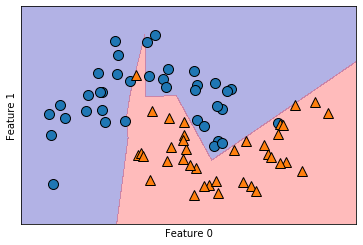

In [13]:
mglearn.plots.plot_2d_separator(mlp2, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

⬆︎隠れ層に10ユニットを持つニューラルネットワークによる、two_moonsデータセットの決定境界

隠れ層のユニット数をたった10にすると、決定境界は少しギザギザになる。

デフォルトでは、reluを用いる。隠れ層が1層の場合には、reluを使うと、決定曲線は10の線分から構成されることになる。

決定曲線をもう少しなめらかにしたければ、隠れ層のユニット数を増やすか、隠れ層を増やすか、非線形活性化関数にtanhを用いれば良い。

In [14]:
# それぞれ10ユニットの隠れ層を2層使う
mlp3 = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp3.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[10, 10], learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Text(0, 0.5, 'Feature 1')

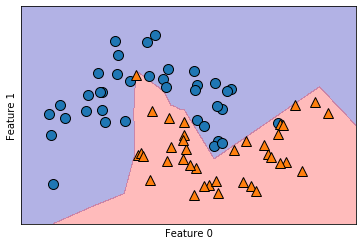

In [15]:
mglearn.plots.plot_2d_separator(mlp3, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [16]:
# それぞれ10ユニットの隠れ層を2層使う、さらに非線形活性化関数にtanhを使う
mlp4 = MLPClassifier(solver='lbfgs',activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp4.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[10, 10], learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Text(0, 0.5, 'Feature 1')

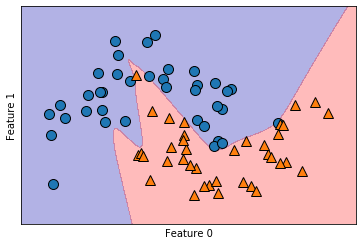

In [17]:
mglearn.plots.plot_2d_separator(mlp4, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")